In [1]:
#字典
vocab = '0123456789qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM$'
vocab = {word: i for i, word in enumerate(vocab)}

vocab

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'q': 10,
 'w': 11,
 'e': 12,
 'r': 13,
 't': 14,
 'y': 15,
 'u': 16,
 'i': 17,
 'o': 18,
 'p': 19,
 'a': 20,
 's': 21,
 'd': 22,
 'f': 23,
 'g': 24,
 'h': 25,
 'j': 26,
 'k': 27,
 'l': 28,
 'z': 29,
 'x': 30,
 'c': 31,
 'v': 32,
 'b': 33,
 'n': 34,
 'm': 35,
 'Q': 36,
 'W': 37,
 'E': 38,
 'R': 39,
 'T': 40,
 'Y': 41,
 'U': 42,
 'I': 43,
 'O': 44,
 'P': 45,
 'A': 46,
 'S': 47,
 'D': 48,
 'F': 49,
 'G': 50,
 'H': 51,
 'J': 52,
 'K': 53,
 'L': 54,
 'Z': 55,
 'X': 56,
 'C': 57,
 'V': 58,
 'B': 59,
 'N': 60,
 'M': 61,
 '$': 62}

In [2]:
#数据
text = 'qwer$tyuio$pasdfghjk$lzxc$vbnmqwea$sdzx$crtyfgh$vbnuioj$klmqazwsx$edcrfvtg$byhnujm$ikolpqwas$erdtghuj$olpzxcv$bnmwaesr$dtfyguh$ijokplsz$dxfcgvhbj$nkmlq12$34567$890098$7654$32112$23344$556677$8890019$28374$65564738$29101232$3453456$45674567$56767878$9890QWERTYU$IOPASDFG$HJKLZX$CVBNMQAZWSXEDCRFVTGBYHNUJMIKOLPQAZWSXIHGVYTDSDZSXDCHGHSYXHKDXHCGHHTXFCGDRXFCGHJDUTSRYEATQEWHDFGLIUGUOGLVGHFXDBCNMXFZSTYJHDSEDGTJDSWAQWDXFTXZERDTFHGHKGUFUGPIGLHVMNHCVMFXCFYTDRFWEAQWWWSXZASXDCFTYFDEHRTYGUILGGVHLIIHLJHKHCGNVMHCNMVFDYFGHGFDRSEXDWZQWZSDXDZWZSDXCFGGXCYFTGHPGVHJHCVHMCFG'

#编码
text = [vocab[i] for i in text]

len(text), text[:10]

(557, [10, 11, 12, 13, 62, 14, 15, 16, 17, 18])

In [3]:
import random


def get_data():
    i = random.randint(3, len(text) - 4)
    x = text[i]

    pos = text[i - 3:i + 4]
    pos.pop(3)

    neg = []
    while len(neg) != 12:
        neg = random.sample(text, 12 + 6)
        neg = [i for i in neg if i not in pos]
        neg = neg[:12]

    return x, pos, neg


get_data()

(0, [8, 9, 0, 1, 9, 62], [5, 32, 15, 2, 42, 50, 58, 57, 38, 57, 10, 51])

In [4]:
import torch


def get_batch():
    x = []
    pos = []
    neg = []
    for _ in range(8):
        data = get_data()
        x.append(data[0])
        pos.append(data[1])
        neg.append(data[2])

    x = torch.LongTensor(x)
    pos = torch.LongTensor(pos)
    neg = torch.LongTensor(neg)

    return x, pos, neg


get_batch()

(tensor([58, 52, 51, 24,  0, 43,  0, 47]),
 tensor([[60, 51, 57, 61, 49, 56],
         [47, 40, 41, 51, 48, 47],
         [40, 41, 52, 48, 47, 38],
         [13, 22, 14, 25, 16, 26],
         [ 9,  8,  9, 36, 37, 38],
         [42, 52, 61, 53, 44, 54],
         [62,  8,  9,  0,  9,  8],
         [37, 37, 37, 56, 55, 46]]),
 tensor([[62, 54, 11, 24, 20, 41, 50, 39, 62, 37,  8, 41],
         [54, 36, 61,  4,  8, 14, 58,  5, 62, 55, 56, 17],
         [57, 45, 46, 31, 35, 42, 56, 18, 26,  7, 13, 62],
         [ 3, 43, 46, 62, 27, 12, 54, 30,  6, 39, 50,  1],
         [10, 20, 46, 22, 62, 46, 20, 56, 51, 62, 50, 62],
         [35, 51,  6, 62,  4, 40, 49, 29, 41,  4, 55, 34],
         [36, 51, 14, 61, 55,  7, 50,  3, 51, 50, 41, 51],
         [62, 49, 50, 51,  6, 12, 61, 18, 32, 48, 38,  1]]))

In [5]:
def get_cos_loss(x, pos, neg):
    #x -> [8, 2]
    #pos -> [8, 6, 2]
    #neg -> [8, 12, 2]

    #[8, 2] -> [8, 2, 1]
    x = x.unsqueeze(dim=2)

    #[8, 6, 2],[8, 2, 1] -> [8, 6]
    loss_pos = torch.bmm(pos, x).squeeze(dim=2)

    #[8, 12, 2],[8, 2, 1] -> [8, 12]
    loss_neg = torch.bmm(neg, -x).squeeze(dim=2)

    #[8, 6] -> [8]
    loss_pos = loss_pos.sigmoid().log().sum(dim=1)

    #[8, 12] -> [8]
    loss_neg = loss_neg.sigmoid().log().sum(dim=1)

    return -(loss_pos + loss_neg).mean()


a, b, c = torch.randn(8, 2), torch.randn(8, 6, 2), torch.randn(8, 12, 2)
get_cos_loss(a, b, c)

tensor(16.0323)

In [6]:
class Model(torch.nn.Module):

    def __init__(self):
        super().__init__()

        #V是词汇量
        self.embed = torch.nn.Embedding(num_embeddings=len(vocab),
                                        embedding_dim=2)

        #初始化参数
        self.embed.weight.data.uniform_(-0.01, 0.01)

    def forward(self, x, pos, neg):
        #编码
        #[8] -> [8, 2]
        x = self.embed(x)

        #[8, 6] -> [8, 6, 2]
        pos = self.embed(pos)

        #[8, 12] -> [8, 12, 2]
        neg = self.embed(neg)

        return get_cos_loss(x, pos, neg)


model = Model()

model(*get_batch())

tensor(12.4767, grad_fn=<NegBackward0>)

In [7]:
def test(test_words):
    embed = model.embed.weight.data.clone()

    for word in test_words:
        x = embed[vocab[word]]
        score = torch.nn.functional.cosine_similarity(x, embed)
        topk = score.topk(k=5).indices
        topk = [list(vocab.keys())[k] for k in topk]
        print(word, topk)


test(['a', 'g', '1', '5', 'Q', 'H'])

a ['a', 'D', 'J', 'B', '7']
g ['g', 'c', '1', 'E', 'i']
1 ['1', 'g', 'c', 'E', 'o']
5 ['5', 'h', 'O', 'Q', 'j']
Q ['Q', 'j', 'V', 'W', 'H']
H ['H', 'W', 'V', 'Z', 'j']


In [8]:
def train():
    global model
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    loss_sum = 0
    for epoch in range(20001):
        batch = get_batch()
        batch = [i.to(device) for i in batch]

        loss = model(*batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()

        if epoch % 5000 == 0:
            print(epoch, loss_sum)
            test(['a', 'g', '1', '5', 'Q', 'H'])
            loss_sum = 0

    model = model.cpu()


train()

0 12.476634979248047
a ['a', 'b', 'f', 'D', 'J']
g ['g', 'T', 'F', 'N', 'o']
1 ['1', 'd', 'U', 'o', 'c']
5 ['5', 'h', 'l', 'Q', 'O']
Q ['Q', 'M', 'h', '5', 'l']
H ['H', 'Z', '2', 'W', '4']
5000 52715.53375816345
a ['a', 'p', 't', 'n', 'b']
g ['g', 'r', 'f', 'y', 'u']
1 ['1', '2', '3', '5', '4']
5 ['5', '4', '3', '6', '8']
Q ['Q', 'W', 'Z', 'A', 'E']
H ['H', 'J', 'N', 'G', 'B']
10000 51967.27362918854
a ['a', 'v', 'h', 'd', 't']
g ['g', 'y', 'f', 'c', 'p']
1 ['1', '2', '3', '5', '6']
5 ['5', '6', '3', '4', '9']
Q ['Q', 'W', 'A', 'Z', 'E']
H ['H', 'G', 'M', 'N', 'J']
15000 52000.14361667633
a ['a', 't', 'p', 'y', 'd']
g ['g', 'r', 'y', 'p', 't']
1 ['1', '2', '5', '4', '8']
5 ['5', '4', '8', '3', '6']
Q ['Q', 'W', 'A', 'Z', 'E']
H ['H', 'N', 'B', 'G', 'J']
20000 51965.81689739227
a ['a', 'v', 'c', 'p', 't']
g ['g', 'b', 'f', 'y', 't']
1 ['1', '2', '3', '8', '5']
5 ['5', '6', '8', '7', '3']
Q ['Q', 'W', 'A', 'Z', 'E']
H ['H', 'J', 'M', 'G', 'B']


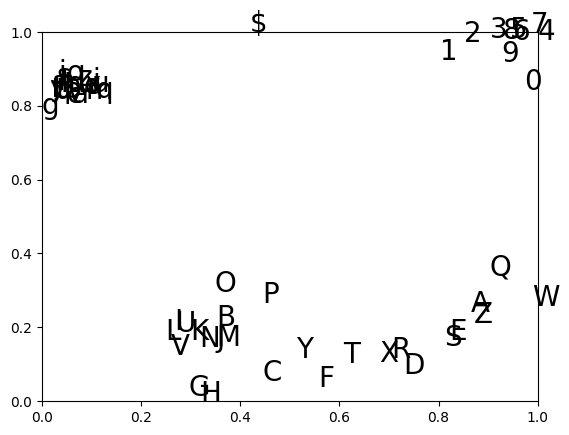

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline


def show():

    #缩放到0-1空间
    embed = model.embed.weight.data.clone()
    embed -= embed.min(dim=0).values
    embed /= embed.max(dim=0).values

    for word, x in vocab.items():
        x = embed[x]
        plt.text(x[0], x[1], word, fontsize=20)

    plt.show()


show()